# Predicting Loan Grants

## Business Understanding

Determine whether or not to grant the loan to the customer based on the likelihood of the loan being repaid

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
%matplotlib inline

In [2]:
loans_df = pd.read_csv('LoansTrainingSet.csv')
loans_df.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


To make prediction model, I will use "Loan Status" as dependent variable and the independent variables will be used to train the model. 

## Data Preparation
I will take a look at the data to see if there is any missing data (NaN values). I will clean up the data

In [3]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            245508 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

From the information above, it looks like there is missing data in "Credit Score", "Annual Income", "Months since last delinquent", "Bankruptcies", and "Tax Liens" fields. I will drop the "Loan ID" and "Customer ID" columns because they will provide no useful information for predicting whether or not a loan should be granted. The describe function will tell us whether or not there are any null inputs in the numerical columns. 

In [4]:
loans_df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


The data needs cleaning as there as some NaN values, also the credit score field should have values ranging from 0 to 800, so a max of 7510 is not possible and needs to be looked into

In [5]:
nan_c = loans_df['Credit Score'].isnull()
loans_df[nan_c].head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,NaN,6 years,Rent,NaN,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,Fully Paid,10036,Short Term,NaN,5 years,Rent,NaN,Debt Consolidation,$386.36,17.7,NaN,7,0,11970,16579,0.0,0.0
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,Short Term,NaN,< 1 year,Own Home,NaN,Debt Consolidation,$597.50,9.9,43.0,7,0,6817,22800,0.0,0.0
20,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,Long Term,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,$745.70,14.9,NaN,10,0,28513,101110,0.0,0.0
22,0003b749-307f-4830-9fb4-9db7ed1b1c48,998dc43c-f9ce-466e-bdaa-7057b0bbb9cd,Fully Paid,7228,Short Term,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,$439.56,17.8,NaN,13,1,8488,15866,1.0,0.0
26,0004d002-a494-4f8a-a528-a6d513812701,4722d542-6684-431c-afb6-ba2e847f1098,Fully Paid,4612,Short Term,NaN,10+ years,Rent,NaN,Debt Consolidation,$262.27,14.0,NaN,4,0,8919,9330,0.0,0.0
38,0008255a-402e-4716-9e0a-8bdf55309781,4e25b6bf-9abc-4bbd-841e-c5a8403b68de,Fully Paid,6114,Short Term,NaN,NaN,Home Mortgage,NaN,Debt Consolidation,$206.97,17.8,21.0,8,1,5772,13975,1.0,0.0
46,000a08fa-e669-46dc-9a96-9da6b96570a0,4b7782a6-b84c-4dd9-ac62-f927a68eeaa9,Charged Off,21160,Long Term,NaN,5 years,Home Mortgage,NaN,Debt Consolidation,"$1,290.98",20.8,NaN,28,0,28175,51227,0.0,0.0
56,000c0c27-1961-4336-b760-a300e1bce9b0,881edf98-387c-4eef-ab71-317a7a5e70c1,Charged Off,6463,Short Term,NaN,1 year,Own Home,NaN,Debt Consolidation,$633.29,19.9,74.0,9,0,8025,24317,0.0,0.0
57,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,7068,Short Term,NaN,NaN,Own Home,NaN,other,$425.68,21.3,NaN,7,1,4178,6850,1.0,0.0


From whats is observed above, rows with missing values in credit score also have missing values in annual income. Both are needed for the model, I will drop NaN values

In [6]:
loans_df = loans_df[loans_df['Credit Score'].notnull()]

In [7]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195308 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         195308 non-null object
Customer ID                     195308 non-null object
Loan Status                     195308 non-null object
Current Loan Amount             195308 non-null int64
Term                            195308 non-null object
Credit Score                    195308 non-null float64
Years in current job            186512 non-null object
Home Ownership                  195308 non-null object
Annual Income                   195308 non-null float64
Purpose                         195308 non-null object
Monthly Debt                    195308 non-null object
Years of Credit History         195308 non-null float64
Months since last delinquent    88466 non-null float64
Number of Open Accounts         195308 non-null int64
Number of Credit Problems       195308 non-null int64
Current Credit Balance          195308 non-null int64
Maximum Op

Need to investigate why the range of "Credit Score" is not within 0 to 800 and fix it

In [8]:
loans_df[['Credit Score']][(loans_df['Credit Score'] > 800)]

,Credit Score
6,6640.0
55,7320.0
71,7180.0
73,6670.0
79,7270.0
84,7070.0
88,7370.0
112,7060.0
126,7410.0
133,7330.0


It is safe to assume these credit score values were incorrectly inputted as they all end with a 0. Without the 0, the values of "Credit Score" fall within the appropriate range. We will remove the 0's on the right side from these values.

In [9]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195308 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         195308 non-null object
Customer ID                     195308 non-null object
Loan Status                     195308 non-null object
Current Loan Amount             195308 non-null int64
Term                            195308 non-null object
Credit Score                    195308 non-null float64
Years in current job            186512 non-null object
Home Ownership                  195308 non-null object
Annual Income                   195308 non-null float64
Purpose                         195308 non-null object
Monthly Debt                    195308 non-null object
Years of Credit History         195308 non-null float64
Months since last delinquent    88466 non-null float64
Number of Open Accounts         195308 non-null int64
Number of Credit Problems       195308 non-null int64
Current Credit Balance          195308 non-null int64
Maximum Op

Monthly Debt and Maximum Open Credit show as object, but they should be float64 since they are numeric values. 

In [10]:
#Remove the 0 from right side of incorrect credit scores by dividing by 10
loans_df['Credit Score'] = loans_df['Credit Score'].map(lambda x: x/10 if x > 800 else x)
# convert Credit Score column from float to int type
loans_df['Credit Score'] = loans_df['Credit Score'].astype(np.int64)

In [11]:
# counts number of credit scores over 800 to see if scores are within range now
loans_df[['Credit Score']][(loans_df['Credit Score'] > 800)].count()

Credit Score    0
dtype: int64

In [12]:
# convert Monthly Debt to float64 data type and remove the $
loans_df['Monthly Debt'] = loans_df['Monthly Debt'].replace( '[\$, ]','', regex=True ).astype(float)
loans_df['Monthly Debt'].head()

0     584.03
1    1106.04
2    1321.85
3     751.92
4     355.18
Name: Monthly Debt, dtype: float64

In [13]:
# convert Maximum Open Credit to int64 data type
loans_df['Maximum Open Credit'] = loans_df['Maximum Open Credit'].convert_objects(convert_numeric=True)
loans_df['Maximum Open Credit'].head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


0    16056.0
1    19149.0
2    28335.0
3    43915.0
4    37081.0
Name: Maximum Open Credit, dtype: float64

In [14]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195308 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         195308 non-null object
Customer ID                     195308 non-null object
Loan Status                     195308 non-null object
Current Loan Amount             195308 non-null int64
Term                            195308 non-null object
Credit Score                    195308 non-null int64
Years in current job            186512 non-null object
Home Ownership                  195308 non-null object
Annual Income                   195308 non-null float64
Purpose                         195308 non-null object
Monthly Debt                    195308 non-null float64
Years of Credit History         195308 non-null float64
Months since last delinquent    88466 non-null float64
Number of Open Accounts         195308 non-null int64
Number of Credit Problems       195308 non-null int64
Current Credit Balance          195308 non-null int64
Maximum Ope

Credit Score values now fall within the range specified and columns are in their proper data types. Now check our unique values.

In [15]:
print("Loan Status:", loans_df['Loan Status'].unique())
print("Term: ", loans_df['Term'].unique())
print("Years in current job: ", loans_df['Years in current job'].unique())
print("Home Ownership: ", loans_df['Home Ownership'].unique())
print("Purpose: ", loans_df['Purpose'].unique())

Loan Status: ['Fully Paid' 'Charged Off']
Term:  ['Short Term' 'Long Term']
Years in current job:  ['10+ years' '4 years' '6 years' nan '3 years' '2 years' '< 1 year'
 '5 years' '1 year' '7 years' '9 years' '8 years']
Home Ownership:  ['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
Purpose:  ['Debt Consolidation' 'other' 'Business Loan' 'Home Improvements'
 'Buy House' 'Other' 'Medical Bills' 'Buy a Car' 'Take a Trip'
 'Educational Expenses']


"Home Ownership" and "Purpose" have duplicate categorical variables. "HaveMorgage" will be changed to "Home Morgage" in the "Home Ownership" column. "other" will be combined with "Other" column in the "Purpose" column.

In [16]:
# change "HaveMortgage" to "Home Morgage"
loans_df['Home Ownership'] = loans_df['Home Ownership'].map(lambda x: 'Home Mortgage' if x == 'HaveMortgage' else x)

In [17]:
# change "other to "Other"
loans_df['Purpose'] = loans_df['Purpose'].map(lambda x: 'Other' if x == 'other' else x)

In [18]:
# check the unique values
print("Home Ownership: ", loans_df['Home Ownership'].unique())
print("Purpose: ", loans_df['Purpose'].unique())

Home Ownership:  ['Home Mortgage' 'Own Home' 'Rent']
Purpose:  ['Debt Consolidation' 'Other' 'Business Loan' 'Home Improvements'
 'Buy House' 'Medical Bills' 'Buy a Car' 'Take a Trip'
 'Educational Expenses']


To determine what to do with the rest of the columns(Let's determine what to do with the rest of the missing variables "Months since last delinquent", "Maximum Open Credit", "Bankruptcies", and "Tax Liens") that have missing info, we will plot graphs for each of them.

Text(0.5,0,'Months since last delinquent')

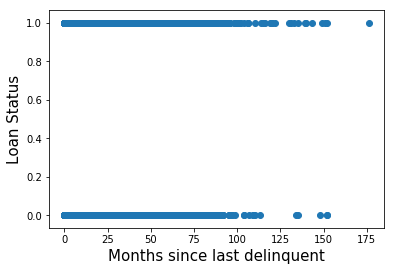

In [19]:
# make new data frame without null values
loans_dfd = loans_df[loans_df['Months since last delinquent'].notnull()]
x_axis = loans_dfd['Months since last delinquent']
y_axis = loans_dfd['Loan Status'].map(lambda x: 1 if x == 'Fully Paid' else 0)

# make the plot
fig = plt.figure()
ax = fig.add_subplot(111)  
ax.scatter(x_axis, y_axis)
ax.set_ylabel('Loan Status', fontsize=15)  
ax.set_xlabel('Months since last delinquent', fontsize=15)

By plotting the "Months since last delinquent" vs "Loan Status", we will see if there is any correlation between the months since last delinquent to the loan being paid off. As seen in the plot; there is no distinguishable differences between the two variables. Therefore, Months since last delinquent would not contribute much to our prediction model.

In [20]:
loans_df = loans_df.drop(['Months since last delinquent'], axis = 1)

Look into the remaining null values in "Maximum Open Credit", "Bankruptcies", and "Tax Liens". 

In [21]:
nan_c = loans_df['Maximum Open Credit'].isnull()
print('Number of missing "Maximum Open Credit entries": ', len(loans_df[nan_c]))

Number of missing "Maximum Open Credit entries":  3


three rows can be dropped since it is not a really big number to keep

In [22]:
loans_df = loans_df[loans_df['Maximum Open Credit'].notnull()] 
# drops rows in Maximum Open Credit with null values

In [23]:
nan_c = loans_df['Bankruptcies'].isnull()
loans_df[nan_c]['Loan Status'].value_counts()

Fully Paid     293
Charged Off    120
Name: Loan Status, dtype: int64

Text(0.5,0,'Bankruptcies')

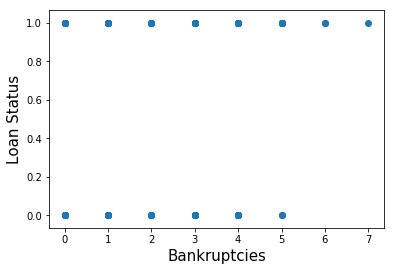

In [24]:
loans_dfb = loans_df[loans_df['Bankruptcies'].notnull()]
x = loans_dfb['Bankruptcies']
y = loans_dfb['Loan Status'].map(lambda x: 1 if x == 'Fully Paid' else 0)

# make the plot
fig = plt.figure()
ax = fig.add_subplot(111)  
ax.scatter(x, y)
ax.set_ylabel('Loan Status', fontsize=15)  
ax.set_xlabel('Bankruptcies', fontsize=15)

In [25]:
nan_c = loans_df['Tax Liens'].isnull()
loans_df[nan_c]['Loan Status'].value_counts()

Fully Paid     14
Charged Off     1
Name: Loan Status, dtype: int64

Text(0.5,0,'Tax Liens')

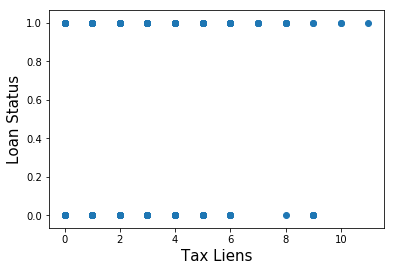

In [26]:
# Prepare data for plotting
loans_dft = loans_df[loans_df['Tax Liens'].notnull()] # makes new data frame without null values
x_ax = loans_dft['Tax Liens']
y_ax = loans_dft['Loan Status'].map(lambda x: 1 if x == 'Fully Paid' else 0)

# make the plot
fig = plt.figure()
ax = fig.add_subplot(111)  
ax.scatter(x_ax, y_ax)
ax.set_ylabel('Loan Status', fontsize=15)  
ax.set_xlabel('Tax Liens', fontsize=15)

Plotting bankruptcies and tax liens against loan status does not show any noticeable correlations. The same applies for both, I will dropping missing values in both columns.

In [27]:
#Drop rows with NaN values in bankruptcies and tax liens column
loans_df = loans_df[loans_df['Bankruptcies'].notnull()] 
loans_df = loans_df[loans_df['Tax Liens'].notnull()]
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194892 entries, 0 to 256983
Data columns (total 18 columns):
Loan ID                      194892 non-null object
Customer ID                  194892 non-null object
Loan Status                  194892 non-null object
Current Loan Amount          194892 non-null int64
Term                         194892 non-null object
Credit Score                 194892 non-null int64
Years in current job         186096 non-null object
Home Ownership               194892 non-null object
Annual Income                194892 non-null float64
Purpose                      194892 non-null object
Monthly Debt                 194892 non-null float64
Years of Credit History      194892 non-null float64
Number of Open Accounts      194892 non-null int64
Number of Credit Problems    194892 non-null int64
Current Credit Balance       194892 non-null int64
Maximum Open Credit          194892 non-null float64
Bankruptcies                 194892 non-null float64
Tax L

Data cleaning process for missing values is complete. Check the Loan ID and Customer ID for duplicate entries. 

In [28]:
print("Unique Loan IDs: ", loans_df['Loan ID'].nunique())
print("Unique Customer IDs: ", loans_df['Customer ID'].nunique())
print("Total entries: ", len(loans_df))

Unique Loan IDs:  170835
Unique Customer IDs:  170835
Total entries:  194892


We have 170,835 unique IDs with 194,892 entries. Some customers are most likely duplicated:

In [29]:
loans_df['Loan ID'].value_counts()

cd76719e-6336-48a7-abb5-9af206ea5021    4
a9179980-bbeb-495f-bc46-5c97e6d467a9    4
f57c84b6-cf4d-4023-ab5d-8ae55a708524    4
5a295130-6bfe-4f74-85e9-0a15f54e5f86    4
d4db913c-03ba-4ba7-99f2-6e1235edc02f    4
39ed36a6-24a8-4973-b748-7fe7f14728c1    4
d11a7e35-c0af-4942-89e8-b4725cd9446a    4
36643180-9f52-412a-b187-7e02c944446d    4
162b3409-55fc-4036-9e11-6db78db3bdcb    4
d76fc89f-83d1-49de-94b7-4a1bf4c9d872    4
e71652cc-48d7-4891-9e9a-ca240a07195f    4
0df6aa2e-3fc6-48b6-8b07-9ffc36a5020f    4
86b77e9a-16fc-4c38-bb88-a58445c14224    4
956c50b3-fca3-4b56-a04c-55263fe6fbe9    4
d0a90144-eaf7-4663-99ad-2cdc6d59e891    4
690a5281-dc43-4556-b3bb-8bcf700e86c9    4
3b00ef42-c7e8-4bd6-894d-88d014dfe973    4
1a09547f-1076-4bf1-8a01-9d9620f64f59    4
0e6033e4-9ea7-48df-8b65-e5b4f7280f9a    4
435fb4f4-b4fd-43cf-b380-ed85a3d04099    4
6e665b6e-87c2-4f2c-9449-ab0cbe45c83e    4
ee54cde9-de2d-442f-b098-e43c82c3910f    4
aea790fa-2538-43f9-bd0f-48ade7983170    4
fc4fcda9-c7a1-4a98-954e-21f17cb9c8

Looking at the value counts shows that some loans are duplicated and these duplicates will be dropped.

In [30]:
loans_df = loans_df.drop_duplicates(['Loan ID'])
print("Unique Loan IDs: ", loans_df['Loan ID'].nunique())
print("Unique Customer IDs: ", loans_df['Customer ID'].nunique())
print("Total entries: ", len(loans_df))

Unique Loan IDs:  170835
Unique Customer IDs:  170835
Total entries:  170835


In [31]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170835 entries, 0 to 256983
Data columns (total 18 columns):
Loan ID                      170835 non-null object
Customer ID                  170835 non-null object
Loan Status                  170835 non-null object
Current Loan Amount          170835 non-null int64
Term                         170835 non-null object
Credit Score                 170835 non-null int64
Years in current job         163512 non-null object
Home Ownership               170835 non-null object
Annual Income                170835 non-null float64
Purpose                      170835 non-null object
Monthly Debt                 170835 non-null float64
Years of Credit History      170835 non-null float64
Number of Open Accounts      170835 non-null int64
Number of Credit Problems    170835 non-null int64
Current Credit Balance       170835 non-null int64
Maximum Open Credit          170835 non-null float64
Bankruptcies                 170835 non-null float64
Tax L

Years in current job is an ordinal variable, which means that its categorical value can be treated as numeric since having greater years of experience in a current job would increase chance of loan grants due to career stability of the customer. n/a and <1 can be considered 0, will convert both to 0.  

In [32]:
loans_df['Years in current job'].fillna(0, inplace= True)
loans_df['Years in current job'] = loans_df['Years in current job'].map(lambda x: '0' if x == '< 1 year' else x)
# remove the strings and convert to integer
loans_df['Years in current job'] = loans_df['Years in current job'].replace('[\+ years]','', regex=True).astype(np.int64)

In [33]:
loans_df['Years in current job'].unique()

array([10,  4,  6,  0,  3,  2,  5,  1,  7,  9,  8])

Now let us see if "Current Loan Amount" is correct/reasonable. To do this, lets filter out anyone taking a loan amount over $100,000 just to inspect dataset.

In [34]:
loans_df[(loans_df['Current Loan Amount'] > 100000)].head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,99999999,Short Term,742,3,Home Mortgage,64760.0,Debt Consolidation,582.84,26.8,11,0,8880,22711.0,0.0,0.0
16,0002c691-5314-44ab-b205-3fb1cc4ee6b2,41207d1e-5d13-43ec-9fe9-f222b4da5e0c,Fully Paid,99999999,Short Term,744,6,Home Mortgage,65605.0,Debt Consolidation,984.07,21.0,5,1,11514,17262.0,1.0,0.0
23,0003fbfd-33ee-4ae9-8074-b46f6ff59281,c14bbc84-5041-4e70-bd64-3db51f7e80ae,Fully Paid,99999999,Short Term,745,10,Rent,39476.0,Other,483.58,15.4,12,0,4636,21171.0,0.0,0.0
28,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,Fully Paid,99999999,Short Term,724,1,Own Home,34297.0,Home Improvements,777.38,13.6,12,0,6720,53335.0,0.0,0.0
42,0008cacc-1ea9-4599-b114-12709b13c85d,cd853967-4535-4d36-bf93-269504c74911,Fully Paid,99999999,Short Term,750,10,Own Home,86785.0,Other,56.41,22.0,7,0,3959,63862.0,0.0,0.0


Interesting... this is an input error seeing as the first 5 rows are taking a loan of \$99,999,999 with an annual income between \$30,000 to \$90,0000. Inputs of this nature will be dropped. 

In [35]:
loans_df = loans_df[loans_df['Current Loan Amount'] < 99999999]

In [36]:
loans_df[(loans_df['Current Loan Amount'] > 100000)].head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


Make a new column called 'Credit Utilization', which will be dividing the 'Current Credit Balance' by the 'Maximum Open Credit'.

In [37]:
loans_df['Credit Utilization'] = loans_df['Current Credit Balance'].div(loans_df['Maximum Open Credit'] + 1, axis='index')

Data cleaning process is complete. 
Prepare data for modeling! First the columns need to be renamed to make it simpler for making dummy variables and prevent problems with column spaces

In [38]:
#convert to binary for easy modeling
loans_df['Loan Status'] = loans_df['Loan Status'].map(lambda x: 1 if x == 'Fully Paid' else 0)

In [39]:
loans_dfm = loans_df.rename(
    columns={'Loan Status': 'y', 'Current Loan Amount': 'x1','Term': 'x2', 
             'Credit Score': 'x3', 'Years in current job': 'x4', 'Home Ownership': 'x5', 
             'Annual Income': 'x6', 'Purpose': 'x7', 'Monthly Debt': 'x8',
             'Years of Credit History': 'x9', 'Number of Open Accounts': 'x10',
             'Number of Credit Problems': 'x11', 'Current Credit Balance': 'x12',
             'Maximum Open Credit': 'x13', 'Bankruptcies': 'x14', 'Tax Liens': 'x15',
             'Credit Utilization': 'x16'})

loans_dfm.head()

,Loan ID,Customer ID,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,Short Term,741,10,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,10,0,6760,16056.0,0.0,0.0,0.421000
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,Short Term,734,4,Home Mortgage,42269.0,Other,1106.04,26.3,17,0,6262,19149.0,0.0,0.0,0.326997
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,Short Term,747,10,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,5,0,20967,28335.0,0.0,0.0,0.739942
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,Short Term,747,10,Own Home,38072.0,Debt Consolidation,751.92,26.2,9,0,22529,43915.0,0.0,0.0,0.513002
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,Short Term,746,4,Rent,50025.0,Debt Consolidation,355.18,11.5,12,0,17391,37081.0,0.0,0.0,0.468988


For easy referral, list of the columns, name, and data:

|Column Name | Variable Name| Data Type|
|---|---|---|
|Loan Status|y| categorical|
|Current Loan Amount| x1| numeric|
|Term| x2| categorical|
|Credit Score| x3| numeric|
|Years in current job| x4| ordinal|
|Home Ownership| x5| categorical|
|Annual Income| x6| numeric|
|Purpose| x7| categorical|
|Monthly Debt| x8| numeric|
|Years of Credit History| x9| numeric|
|Number of Open Accounts| x10| numeric|
|Number of Credit Problems| x11| numeric|
|Current Credit Balance| x12| numeric|
|Maximum Open Credit| x13| numeric|
|Bankruptcies| x14| numeric|
|Tax Liens| x15| numeric|
|Credit Utilization| x16| numeric|

In [40]:
# Create the dummy variables for categorical values using dmatrices
y, X = dmatrices('y ~ x1 + C(x2) + x3 + x4 + C(x5) + x6 + C(x7) + x8 + x9 + x10 + x11 + x12 + x13 + x14 + x15 + x16', loans_dfm, return_type = 'dataframe')
X.head()

,Intercept,C(x2)[T.Short Term],C(x5)[T.Own Home],C(x5)[T.Rent],C(x7)[T.Buy House],C(x7)[T.Buy a Car],C(x7)[T.Debt Consolidation],C(x7)[T.Educational Expenses],C(x7)[T.Home Improvements],C(x7)[T.Medical Bills],...,x6,x8,x9,x10,x11,x12,x13,x14,x15,x16
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,33694.0,584.03,12.3,10.0,0.0,6760.0,16056.0,0.0,0.0,0.421000
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42269.0,1106.04,26.3,17.0,0.0,6262.0,19149.0,0.0,0.0,0.326997
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,90126.0,1321.85,28.8,5.0,0.0,20967.0,28335.0,0.0,0.0,0.739942
3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,38072.0,751.92,26.2,9.0,0.0,22529.0,43915.0,0.0,0.0,0.513002
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,50025.0,355.18,11.5,12.0,0.0,17391.0,37081.0,0.0,0.0,0.468988


In [41]:
y.head()

,y
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


## Modeling
Since this problem results in a binary output, we will select algorithms that are good at classification: Logistic Regression, Adaboost and Gradient Boosting. 

In [42]:
# Split the data into 70% Training Data and 30% Testing Data with seed(0)
#import algorithms
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [44]:
# sklearn Logistic Regression
reg = LogisticRegression(fit_intercept = False, C = 1e9)
logmodel = reg.fit(X_train, y_train)

# Make predictions and determine accuracy score
y_predlog = logmodel.predict(X_test)

acc_log = accuracy_score(y_predlog, y_test)

print(acc_log)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7259328404038419


In [45]:
# Gradient Boosting
params = {'n_estimators': 600, 'max_depth': 1,
          'learning_rate': 0.1, 'min_samples_leaf': 1, 'random_state': 42}
gbc = GradientBoostingClassifier(**params)
gbcmodel = gbc.fit(X_train, y_train)

y_predgbc = gbcmodel.predict(X_test)

acc_gbc = accuracy_score(y_predgbc, y_test)

print(acc_gbc)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7362745338868555


In [46]:
# Random Forest
rf = RandomForestClassifier(n_estimators= 25, max_depth= None, max_features = 0.4, random_state = 42)
rfmodel = rf.fit(X_train, y_train)

y_predrf = rfmodel.predict(X_test)

acc_rf = accuracy_score(y_predrf, y_test)

print(acc_rf)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7250730796629737
